In [94]:
import numpy as np
import pandas as pd
from sklearn.model_selection import cross_val_score, train_test_split, KFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, accuracy_score
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt

In [95]:
data = load_iris()
X = data.data
y = data.target

In [96]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [97]:
model = LogisticRegression()


In [98]:
cv = KFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(model, X_train, y_train, cv=cv, scoring='accuracy')

In [99]:
model.fit(X_train, y_train)

LogisticRegression()

In [100]:
model.score(X_test, y_test)

1.0

In [101]:
train_preds = model.predict(X_train)
test_preds = model.predict(X_test)

In [102]:
train_error = mean_squared_error(y_train, train_preds)
test_error = mean_squared_error(y_test, test_preds)

In [103]:
cv_mean = cv_scores.mean()
cv_std = cv_scores.std()

In [104]:
print(f"Cross-Validation Accuracy: {cv_mean:.4f} ± {cv_std:.4f}")
print(f"Training Error (Bias): {train_error:.4f}")
print(f"Test Error (Variance): {test_error:.4f}")


Cross-Validation Accuracy: 0.9500 ± 0.0486
Training Error (Bias): 0.0250
Test Error (Variance): 0.0000


In [105]:
errors = {'Training Error': train_error, 'Test Error': test_error}


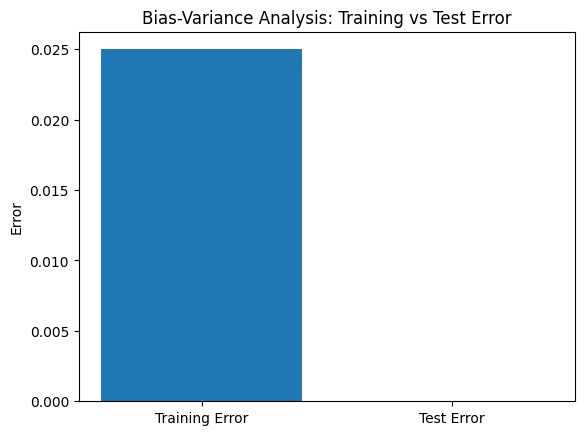

In [106]:
plt.bar(errors.keys(), errors.values())
plt.ylabel('Error')
plt.title('Bias-Variance Analysis: Training vs Test Error')
plt.show()